#HW1 - Geometrical Optics

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

A central problem in spectroscopy is getting light from the experiment to the measurement system. You must use a correctly designed optical system to accomplish this task if you are to get the largest signal.

<img src="mono.png">

Let's assume that the source of light in your experiment emits 10<sup>12</sup> photons per second in all directions at 500 nm. The source's height is (object height, ho) 1.5 mm and its width is (object width, wo) 90 microns. You will measure the light with a monochromator and a detector. The monochromator has entrance and exit slits that are the same size. Your monochromator has a 40 micron slit width and a 0.9 mm slit height. It also has an f/8 aperture where the f/# is defined as the ratio of the focal length of the monochromator to the width of the diffraction grating It defines the angle of acceptance into the monochromator. You will use a lens that has a 20 cm focal length and 8 cm diameter. Your independent variable is the distance between the source of light and the lens, i.e. the object distance, xo. The distance between the source and monochromator can be changed so you wil locate your monochromator at a position where the light source is focused on the entrance slit. Use the lense equations to define the distance to the image and the size of the image. An example graph is shown below.

<img src="HW1_example.png">

##1
Make a series of graphs that show the power (photons/second), intensity (photons/sec. cm<sup>2</sup>), brightness (photons/sec. cm<sup>2</sup> steradian) at the entrance slit of the monochromator and the signal (photons/sec) at the detector as a function of xo. (I get values of 4x10<sup>8</sup>, 4.7x10<sup>12</sup>, 5.9x10<sup>13</sup>, 6.1x10<sup>7</sup> when I use an object distance of xo = 100 cm. Don't accept my answers as correct though.)

Some example code is left below to get you started.

In [2]:
# properties of light source
ps = 1e12  # photons/second
wo = 0.009  # cm
ho = 0.15  # cm
brightness = ps/(wo*ho*4*np.pi)

In [3]:
# properties of monochromator
mono_focal = 8.  # cm
sm = (4*np.pi)/(16*mono_focal**2)
hs = 0.09  # cm
ws = 0.004  # cm

In [4]:
# we will create an array 'xo' which will serve is the dependent variable in this problem set
xo = np.linspace(25, 100, 500)  # cm
print xo.shape

(500L,)


(500L,)


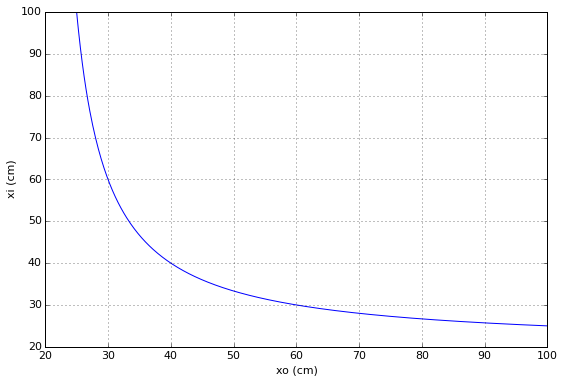

In [5]:
# we can use the lens equation to calculate xi
lens_diameter = 8.  # cm
lens_focal = 20.  # cm
xi = 1./((1/lens_focal)-(1/xo))
# note that xi is now an array, since xo was an array
print xi.shape
# let's graph xi vs xo
plt.plot(xo, xi)
plt.xlabel('xo (cm)')
plt.ylabel('xi (cm)')
plt.grid()

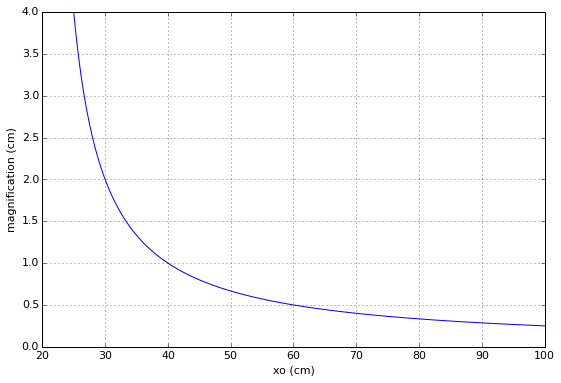

In [6]:
# now lets calculate magnification and solid angle of the image
magnification = xi/xo
si = (4*np.pi)/(16*(xi/lens_diameter)**2)
# let's graph the magnification against xo
plt.plot(xo, magnification)
plt.xlabel('xo (cm)')
plt.ylabel('magnification (cm)')
plt.grid()

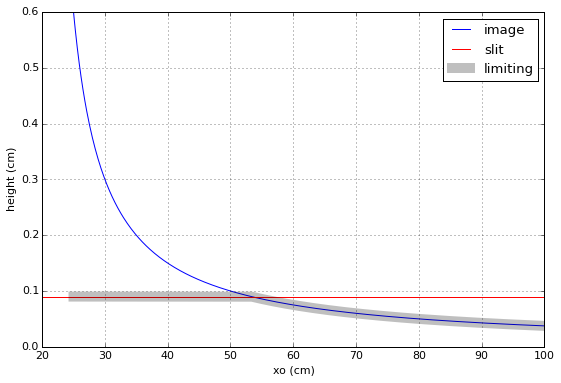

In [7]:
# let's consider the height of the image
hi = magnification*ho
# we can use the minimum function to find the element-wise minimum between hi and hs
h_limiting = np.minimum(hi, hs)
# let's plot again
plt.plot(xo, hi)
# axhline can be used to create a horizontal line at a give location
plt.axhline(hs, c='r')  # c is used to set the color
plt.plot(xo, h_limiting, c='k', lw=10, alpha=0.25)
plt.xlabel('xo (cm)')
plt.ylabel('height (cm)')
plt.grid()
# let's add a legend to keep ourselves straight
plt.legend(['image', 'slit', 'limiting'])

##2
What are the conditions for the heights, widths, and solid angles that give the maximum signal?

The height and width of the image should be larger than the monochromator slit, so in this case, 0.09cm height and 0.004cm respectively, or xo < 53.2cm. The solid angle should be minimized, so it must be smaller than the solid angle of the monochromator, which in this case is close to 0.0123cm, or xo > 29.2.


##3
Describe what happens to the size of the power, intensity, and brightness of the image at the monochromator's entrance slit as xo increases. Do they increase, decrease, or stay the same? Explain why they have that behavior

The power decreases as xo increases because as we move the source futher away, the solid angle of the object decreases i.e. less of the source photons hit the lens. The intensity increases with xo because, as we can see from the magnification equation, 

##4
Describe what happens to the size of the image, the position of the image, the size of the solid angle associated with the image at the monochromator's enterance slit, and the distance between the source and the monochromator as xo increases. Do they increase, decrease, or stay the same?

As xo increases, the size of the image is smaller, and it's position is further from the lens. The solid angle decreases with increasing xo. Since we are moving the source to increase xo, the distance between the source and the monochromator increases.

##5
From your graph in question 1, describe what happens to the signal as xo changes and explain why the signal changes in the way that it does. Could you get more signal by changing the lens? Prove it.